In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [76]:
sns.set(style="ticks")
sns.set_style('whitegrid')

NUM_INFERENCE = 200

PROBLEM_NAMES = ["RoomOccupancy", "DrowsinessDetection", "TimeseriesForecast"]
DEVICE_NAMES = ["ESP-32", "Arduino", "ESP-8266"]
MODEL_COMPLEXITIES = ["small", "medium", "large"]

# https://r02b.github.io/seaborn_palettes/
PALETTES = {
    "ESP-32":   {MODEL_COMPLEXITIES[idx-2]:sns.color_palette(palette="Greens")[idx] for idx in range(2, 5)},
    "Arduino":  {MODEL_COMPLEXITIES[idx-2]:sns.color_palette(palette="Blues")[idx] for idx in range(2, 5)},
    "ESP-8266": {MODEL_COMPLEXITIES[idx-2]:sns.color_palette(palette="Oranges")[idx+1] for idx in range(2, 5)},
}

PATH_IMG = "imgRes/"

In [77]:
time_inference = {}

for problem_name in PROBLEM_NAMES:
    time_inference[problem_name] = {}
    for device_name in DEVICE_NAMES:
        time_inference[problem_name][device_name] = {}
        for model_complexity in MODEL_COMPLEXITIES:
            df = pd.read_csv("timeInference/"+problem_name+"_"+device_name+"_"+model_complexity+".txt", header=None).rename(columns={0: "time"})
            if (df.shape[0] == NUM_INFERENCE):
                time_inference[problem_name][device_name][model_complexity] = df
            else:
                print("ERRORE "+problem_name+"_"+device_name+"_"+model_complexity+": attesi "+str(NUM_INFERENCE)+" elementi, trovati "+ str(df.shape[0]))
                

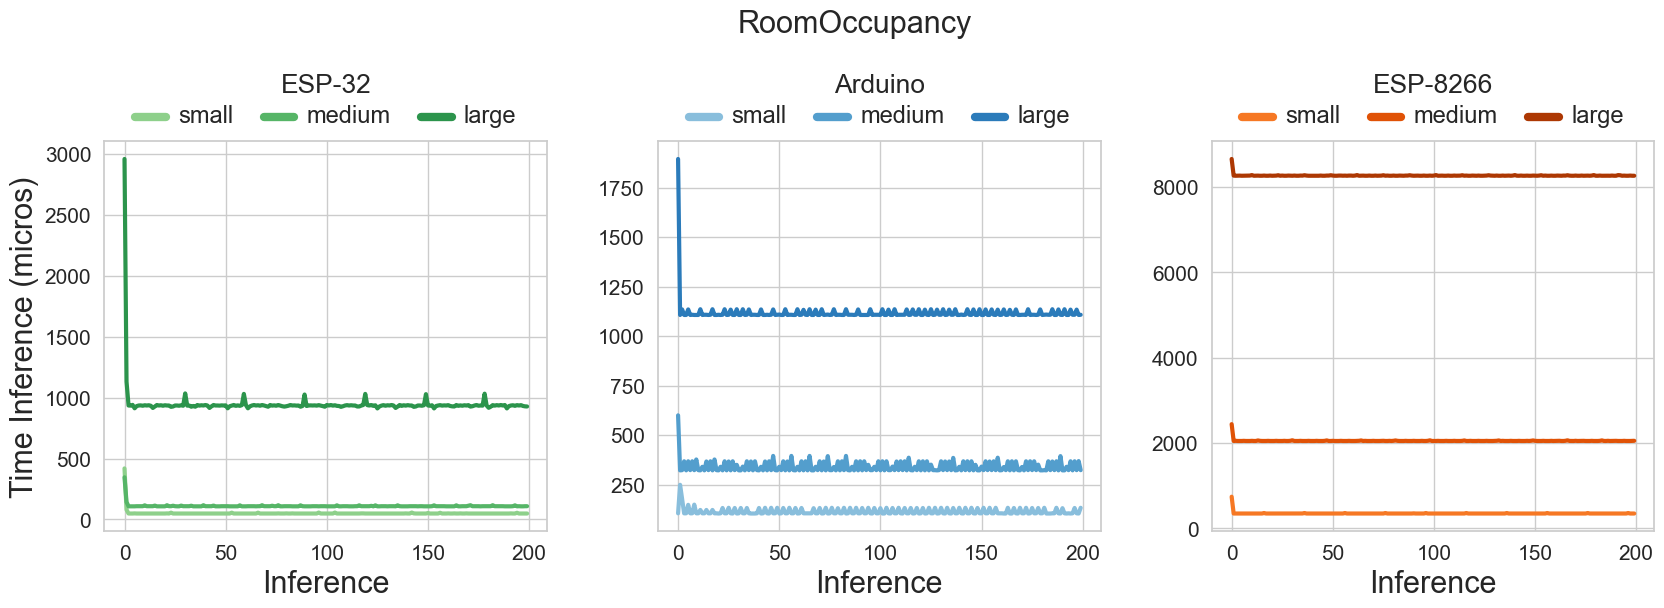

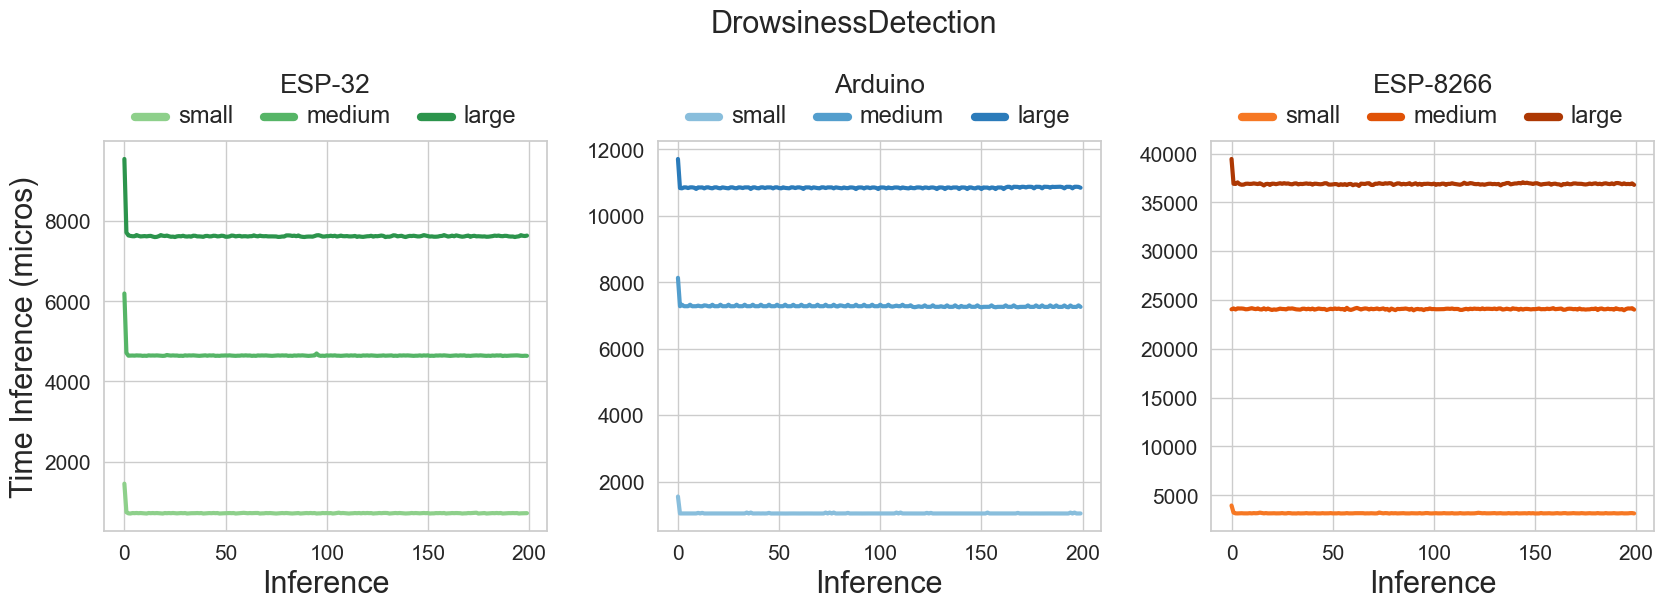

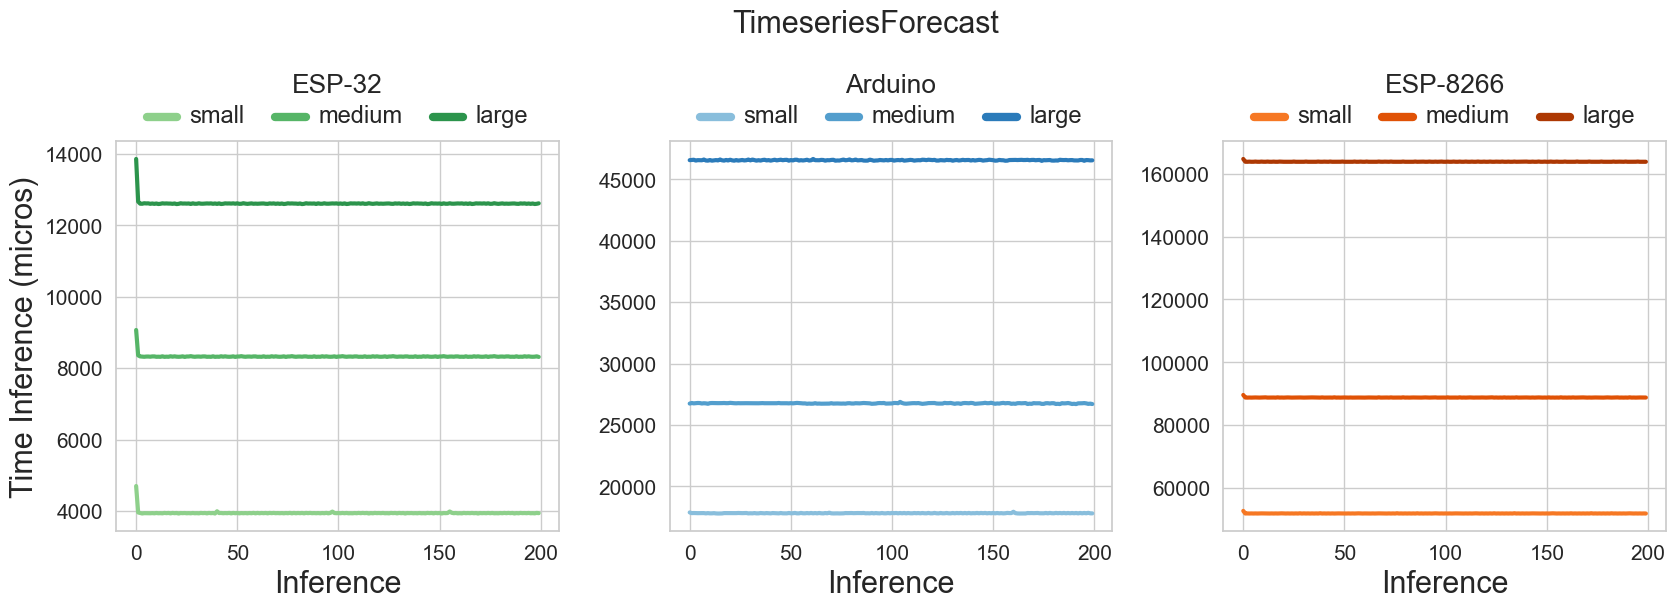

In [115]:
for problem_name in PROBLEM_NAMES:

    fig, axes = plt.subplots(1, len(DEVICE_NAMES), figsize=(20, 6))
    fig.suptitle(problem_name, fontsize=22)
    #fig.tight_layout(pad=20)

    for idx, device_name in enumerate(DEVICE_NAMES):
        y_name = "Time Inference (micros)"
        x_name = "Inference"

        time_inference_device = time_inference[problem_name][device_name]
        dict_for_df = {m_complex: time_inference_device[m_complex]["time"] for m_complex in MODEL_COMPLEXITIES}
        dict_for_df[x_name] = [i for i in range(NUM_INFERENCE)]
        df_to_print = pd.DataFrame( dict_for_df )
        df_to_print = pd.melt(df_to_print, [x_name], var_name="Model Complexity", value_name=y_name)

        res = sns.lineplot(ax=axes[idx], x=x_name, y=y_name, linewidth=3,
                     data=df_to_print, hue="Model Complexity", palette=PALETTES[device_name].values())
        
        for legobj in res.get_legend().legend_handles:
            legobj.set_linewidth(6.0)

        sns.move_legend( res, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=device_name, frameon=False)
        plt.setp(res.get_legend().get_texts(), fontsize='17')
        plt.setp(res.get_legend().get_title(), fontsize='19')

        #sns.move_legend(res, "upper right")
        res.set_xlabel("Inference",fontsize=22)
        if device_name == "ESP-32":
            res.set_ylabel("Time Inference (micros)",fontsize=22)
        else:
            res.set_ylabel(" ")
        res.tick_params(labelsize=15)
        #plt.setp(res.get_legend().get_texts(), fontsize='22') 
        #plt.setp(res.get_legend().get_title(), fontsize='20') 
        #axes[idx].set_title(device_name, fontsize=20)
    
    plt.subplots_adjust(wspace=0.25, top=0.76)
    plt.savefig(PATH_IMG+problem_name+".png")

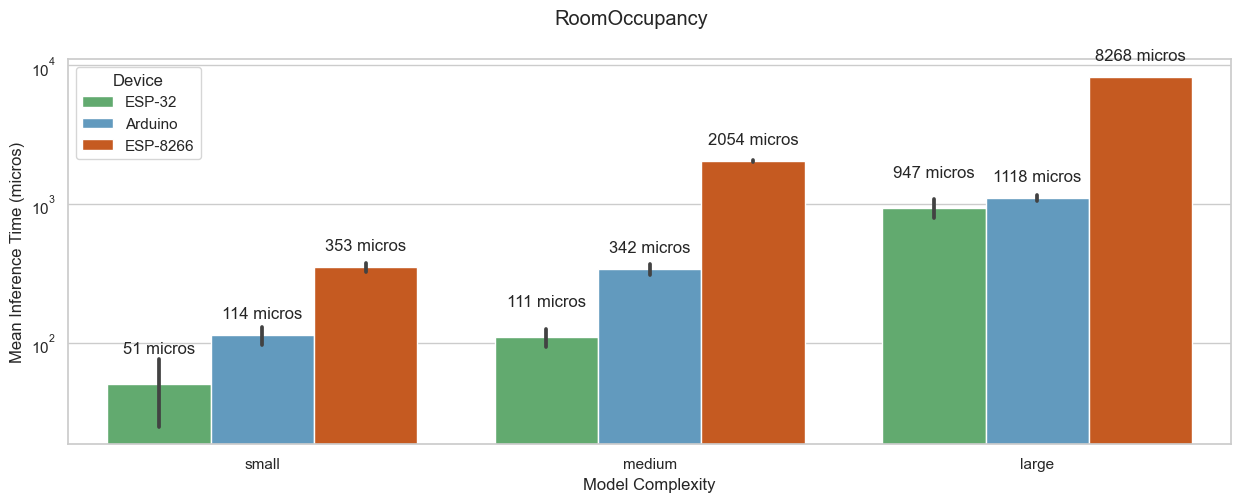

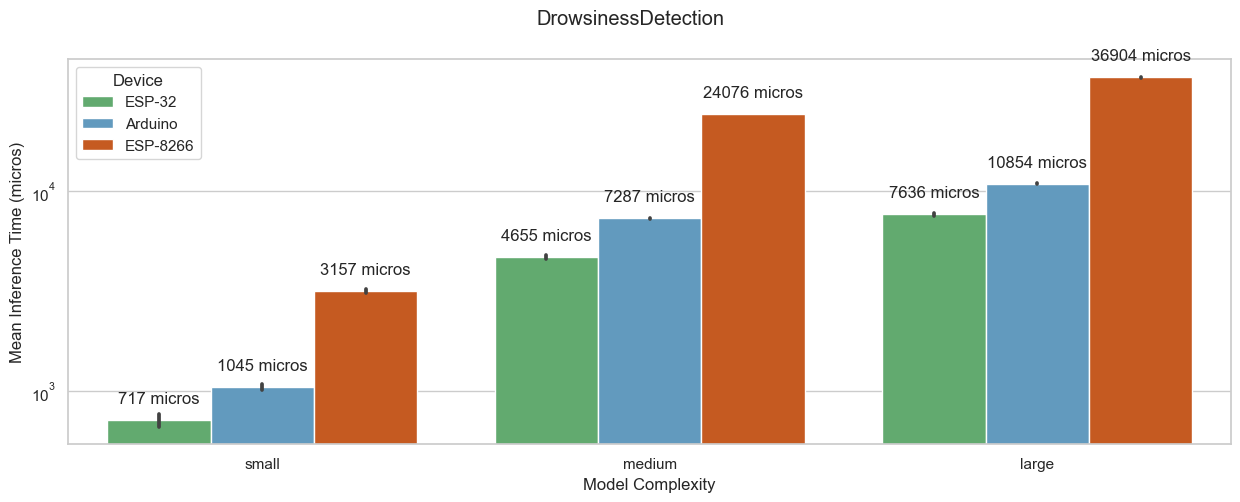

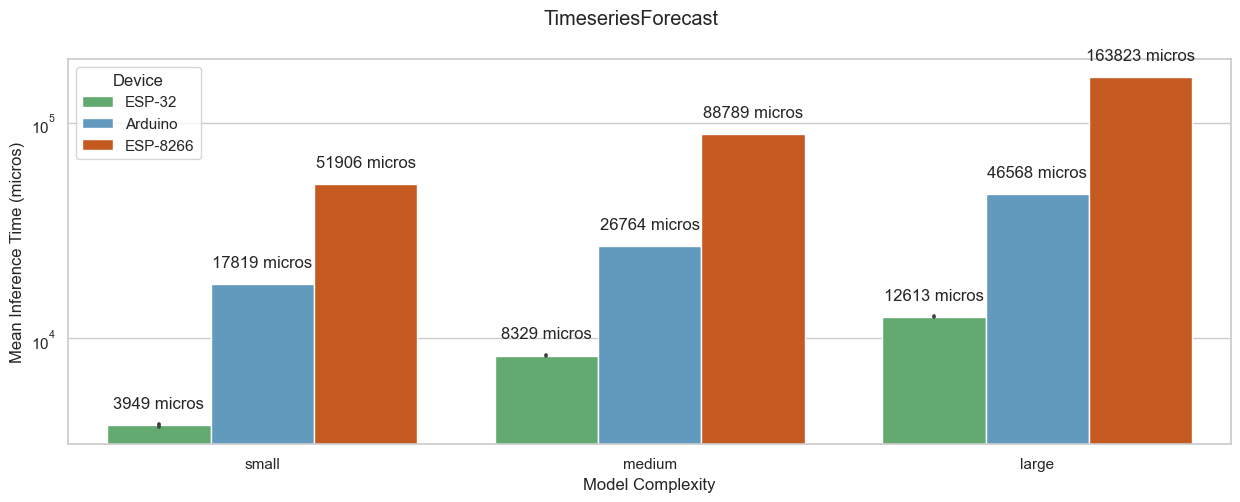

In [28]:
for problem_name in PROBLEM_NAMES:

    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(problem_name)

    devices = []
    inferences = []
    m_complex = []

    for device_name in DEVICE_NAMES:

        time_inference_device = time_inference[problem_name][device_name]

        for model_complexity in MODEL_COMPLEXITIES:

            devices += [device_name for _ in range(NUM_INFERENCE)]
            m_complex += [model_complexity for _ in range(NUM_INFERENCE)]
            inferences += list(time_inference_device[model_complexity]["time"])

    dict_for_df = {"Device": devices, "Mean Inference Time (micros)": inferences, "Model Complexity": m_complex}
    df_to_print = pd.DataFrame( dict_for_df )
    
    ax = sns.barplot(data=df_to_print, x="Model Complexity", y="Mean Inference Time (micros)", errorbar="sd",
                hue="Device", palette=[PALETTES[device_name]["medium"] for device_name in DEVICE_NAMES])
    ax.set(yscale='log')
    for idx, i in enumerate(ax.containers):
        padding = 20 if (problem_name=="RoomOccupancy" and idx==0) else 10
        ax.bar_label(i, fmt="%.0f micros", padding=padding)
    plt.savefig(PATH_IMG+problem_name+"_avg.png")

## Quantizzazione

In [122]:
DEVICE_QUANT = "ESP-8266"
quant_time_inference = {}

for problem_name in PROBLEM_NAMES:
    quant_time_inference[problem_name] = {}
    df = pd.read_csv("timeInference/"+problem_name+"_"+DEVICE_QUANT+"_large.txt", header=None).rename(columns={0: "time"})
    if (df.shape[0] == NUM_INFERENCE):
        quant_time_inference[problem_name]["no_quant"] = df
    else:
        print("ERRORE "+problem_name+" no_quant: attesi "+str(NUM_INFERENCE)+" elementi, trovati "+ str(df.shape[0]))
    
    df_quant = pd.read_csv("timeInference/"+problem_name+"_"+DEVICE_QUANT+"_large_quant.txt", header=None).rename(columns={0: "time"})
    if (df_quant.shape[0] == NUM_INFERENCE):
        quant_time_inference[problem_name]["quant"] = df_quant
    else:
        print("ERRORE "+problem_name+" quant"+": attesi "+str(NUM_INFERENCE)+" elementi, trovati "+ str(df_quant.shape[0]))
       
PALETTES_QUANT = { "ESP-8266": [sns.color_palette(palette="Oranges")[3], sns.color_palette(palette="Oranges")[4]] }

/var/folders/z3/yl30gjf55_x2qqgttnn1gjjc0000gn/T/ipykernel_64642/2246196618.py:44: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(19)
/var/folders/z3/yl30gjf55_x2qqgttnn1gjjc0000gn/T/ipykernel_64642/2246196618.py:44: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(19)
/var/folders/z3/yl30gjf55_x2qqgttnn1gjjc0000gn/T/ipykernel_64642/2246196618.py:44: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(19)


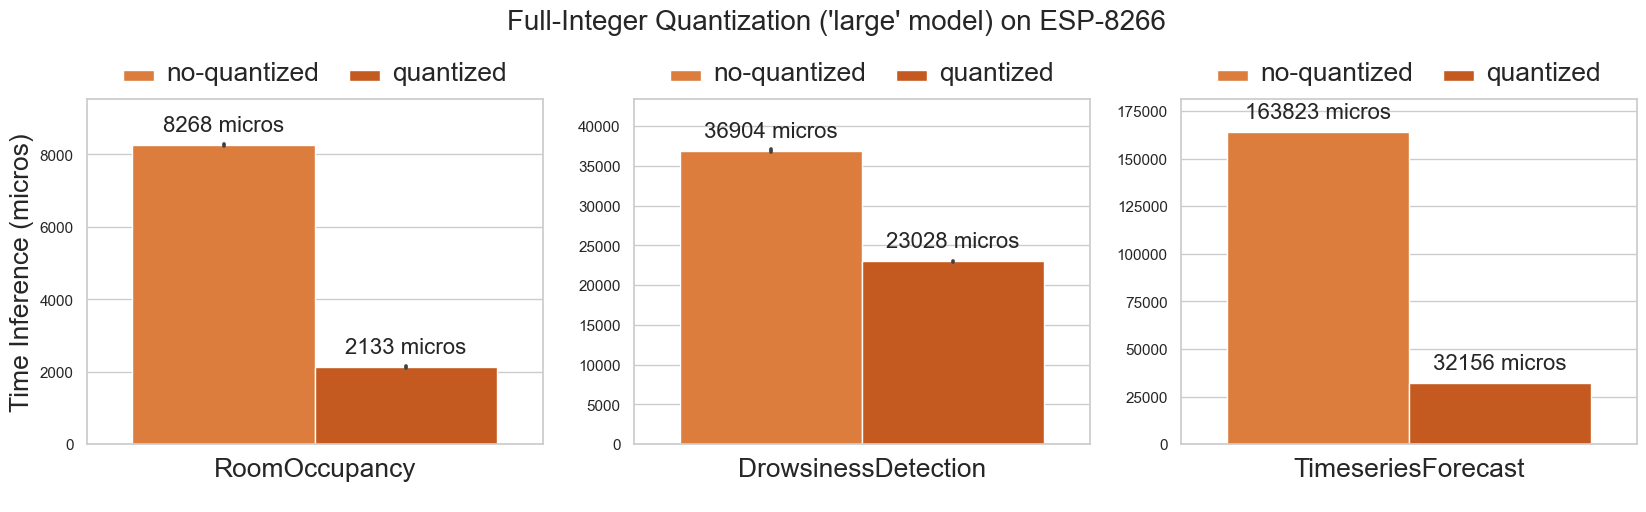

In [123]:
fig, axes = plt.subplots(1, len(PROBLEM_NAMES), figsize=(20, 5))
fig.suptitle("Full-Integer Quantization ('large' model) on ESP-8266", fontsize=20)

for idx, problem_name in enumerate(PROBLEM_NAMES):
    inferences = []
    m_type = []
    problem_type = []

    # no-quant
    problem_type += [problem_name for _ in range(NUM_INFERENCE)]
    m_type  += ["no-quantized" for _ in range(NUM_INFERENCE)]
    inferences += list(quant_time_inference[problem_name]["no_quant"]["time"])

    # quant
    problem_type += [problem_name for _ in range(NUM_INFERENCE)]
    m_type  += ["quantized" for _ in range(NUM_INFERENCE)]
    inferences += list(quant_time_inference[problem_name]["quant"]["time"])

    df_to_print = pd.DataFrame( {"Mean Inference Time (micros)": inferences, 
                                "Model Type": m_type, "Problem type": problem_type} )
    
    if problem_name != "DrowsinessDetection":
        plt.legend([], [], frameon=False)  

    ax = sns.barplot(data=df_to_print, ax=axes[idx], 
                     x="Problem type", y="Mean Inference Time (micros)", errorbar="sd",
                     hue="Model Type", palette=PALETTES_QUANT[DEVICE_QUANT])

    ax.set(ylim=(0, max(inferences)+( (max(inferences)/100)*10 ) ) )
    ax.set_xlabel(" ")

    if problem_name == "RoomOccupancy":
        ax.set_ylabel("Time Inference (micros)",fontsize=19)
    else:
        ax.set_ylabel(" ")

    sns.move_legend( ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
    plt.setp(ax.get_legend().get_texts(), fontsize='19')

    for idx, i in enumerate(ax.containers):
        ax.bar_label(i, fmt="%.0f micros", padding=7, fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(19)
        
    res.tick_params(labelsize=15)
    #axes[idx].set_title(device_name, fontsize=20)
    
plt.subplots_adjust(wspace=0.2, top=0.80)
plt.savefig(PATH_IMG+"quantization_avg.png")